In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

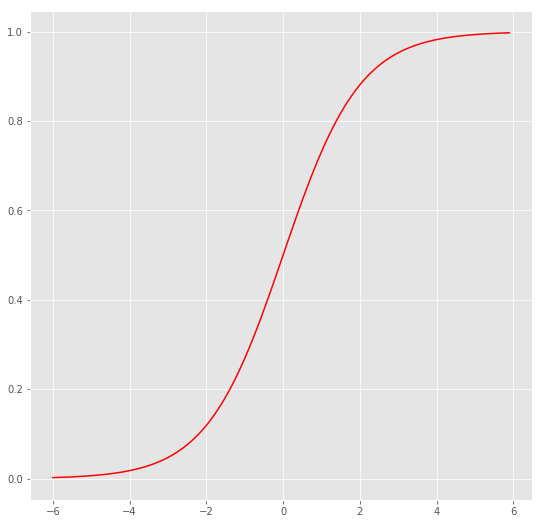

In [2]:
plt.figure(figsize=(9,9))

def sigmoid(t):                          # Define the sigmoid function
    return (1/(1 + np.e**(-t)))    

plot_range = np.arange(-6, 6, 0.1)       

y_values = sigmoid(plot_range)

# Plot curve
plt.plot(plot_range,   # X-axis range
         y_values,          # Predicted values
         color="red")

In [3]:
import os

In [6]:
titanic_train = pd.read_csv("C:\\Users\\fishk\\Downloads\\train_data.csv")    # Read the data
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
char_cabin = titanic_train["Cabin"].astype(str) # Convert cabin to str

In [8]:
new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

In [9]:
titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

In [10]:
# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

In [11]:
from sklearn import linear_model
from sklearn import preprocessing

In [12]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), 
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[1.00027876]
[[-2.43010712]]


In [15]:
# Make predictions
preds = log_model.predict_proba(X= pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ["Death_prob", "Survival_prob"]

# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], preds.loc[:, "Survival_prob"])

Survival_prob,0.19312542897248655,0.7311133823315542
Sex,,
female,0,314
male,577,0


In [16]:
encoded_class = label_encoder.fit_transform(titanic_train["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_train["Cabin"])

train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["Age"]]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = train_features ,
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[3.32716302]
[[-0.90790164 -0.06426483 -2.43179802 -0.0265924 ]]


In [17]:
# Make predictions
preds = log_model.predict(X= train_features)

# Generate table of predictions vs actual
pd.crosstab(preds,titanic_train["Survived"])

Survived,0,1
row_0,,
0,463,98
1,86,244


In [18]:
(463+244)/891

0.7934904601571269

In [19]:
log_model.score(X = train_features ,
                y = titanic_train["Survived"])

0.7934904601571269

In [20]:
from sklearn import metrics

In [21]:
# View confusion matrix
metrics.confusion_matrix(y_true=titanic_train["Survived"],  # True labels
                         y_pred=preds) # Predicted labels

array([[463,  86],
       [ 98, 244]], dtype=int64)

In [22]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=titanic_train["Survived"],
                              y_pred=preds) )

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       549
          1       0.74      0.71      0.73       342

avg / total       0.79      0.79      0.79       891



In [23]:
# Read and prepare test data
titanic_test = pd.read_csv("C:\\Users\\fishk\\Downloads\\test_data.csv")    # Read the data

char_cabin = titanic_test["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_test["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_test["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_test["Age"])      # Value if check is false

titanic_test["Age"] = new_age_var 

In [24]:
# Convert test variables to match model features
encoded_sex = label_encoder.fit_transform(titanic_test["Sex"])
encoded_class = label_encoder.fit_transform(titanic_test["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_test["Cabin"])

test_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_test["Age"]]).T

In [25]:
# Make test set predictions
test_preds = log_model.predict(X=test_features)

# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})

# Save submission to CSV
submission.to_csv("tutorial_logreg_submission.csv", 
                  index=False)        # Do not save index values